# Import

In [ ]:
# 1. Gỡ numpy, pandas, matplotlib và các bản build lỗi
!pip uninstall -y numpy pandas matplotlib
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4

# 2. Cài retentioneering bản RC8
!pip install --pre retentioneering --upgrade


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 102.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires nu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 7.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.5/947.5 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.9/426.9 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import numpy
import pandas
import matplotlib
import retentioneering

print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__)
print("retentioneering:", retentioneering.__version__)

numpy: 1.26.4
pandas: 2.2.2
matplotlib: 3.8.4
retentioneering: 4.0.0rc8


In [ ]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

project_id = 'crazy-coffee-jam'

from google.colab import auth
auth.authenticate_user()
# Construct a BigQuery client object.
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
query = f"""
SELECT
  user_pseudo_id,
  country,
  platform,
  product_id,
  event_timestamp
from `crazy-coffee-jam.flatten_table.in_app_purchase`
where user_pseudo_id in (select distinct user_pseudo_id from `crazy-coffee-jam.flatten_table.first_open` where event_date between '2025-07-01' and '2025-07-31')
ORDER BY
  user_pseudo_id,
  event_timestamp
"""
df = client.query(query).to_dataframe()
df

,user_pseudo_id,country,platform,product_id,event_timestamp
0,01434F9FE5BA4CBDAD08F55B295E2FDD,Italy,IOS,coffee.jam.starter_pack,1753572487056133
1,0166A91F60854B6A8D5D15CA572C8620,United Kingdom,IOS,coffee.jam.starter_pack,1753912330292278
2,017254d918ff1585bc8988873fb605a6,United States,ANDROID,coffee.jam.gold_pass,1753367106489270
3,017EF4A439E14351B18DCAB8366D5343,United Kingdom,IOS,coffee.jam.booster_pack,1753426665191023
4,017EF4A439E14351B18DCAB8366D5343,United Kingdom,IOS,coffee.jam.booster_pack,1753709116953918
...,...,...,...,...,...
1555,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,coffee.jam.remove_ads_special,1752981326869651
1556,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,coffee.jam.starter_pack,1752984409436364
1557,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,coffee.jam.small_pack,1753587854836637
1558,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,coffee.jam.small_pack,1753657598863901


In [ ]:
df['product_id'] = df['product_id'].str.replace('coffee.jam.', '', regex=False)
display(df)

,user_pseudo_id,country,platform,product_id,event_timestamp
0,01434F9FE5BA4CBDAD08F55B295E2FDD,Italy,IOS,starter_pack,1753572487056133
1,0166A91F60854B6A8D5D15CA572C8620,United Kingdom,IOS,starter_pack,1753912330292278
2,017254d918ff1585bc8988873fb605a6,United States,ANDROID,gold_pass,1753367106489270
3,017EF4A439E14351B18DCAB8366D5343,United Kingdom,IOS,booster_pack,1753426665191023
4,017EF4A439E14351B18DCAB8366D5343,United Kingdom,IOS,booster_pack,1753709116953918
...,...,...,...,...,...
1555,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,remove_ads_special,1752981326869651
1556,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,starter_pack,1752984409436364
1557,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,small_pack,1753587854836637
1558,ffb2ef57b18135de4702a5416c45340e,United States,ANDROID,small_pack,1753657598863901


In [ ]:
df['event_time'] = pd.to_datetime(df['event_timestamp'], unit='us')  # 'us' = microseconds

In [ ]:
from retentioneering.eventstream import Eventstream

raw_data_schema = {
    'user_id': 'user_pseudo_id',
    'event_name': 'product_id',
    'event_timestamp': 'event_time'
}

stream = Eventstream(raw_data=df, raw_data_schema=raw_data_schema)

In [ ]:
stream_df = stream.to_dataframe()
stream_df

,event_id,event_type,event_index,event,timestamp,user_id,country,platform,event_timestamp
0,36d4a378-0879-47c1-89ee-e01dbeff0a5a,path_start,0,path_start,2025-06-30 21:40:22.295537,7387fe9776ee56c840fc6909b1ef6f45,Germany,ANDROID,1751319622295537
1,36d4a378-0879-47c1-89ee-e01dbeff0a5a,raw,0,remove_ads,2025-06-30 21:40:22.295537,7387fe9776ee56c840fc6909b1ef6f45,Germany,ANDROID,1751319622295537
2,c6ac201f-7024-4f5d-97cf-d55a86b37d9c,path_start,1,path_start,2025-07-01 03:51:12.237609,4fd66e1f357b7c7f7ad5d0d348a1e8a8,United States,ANDROID,1751341872237609
3,c6ac201f-7024-4f5d-97cf-d55a86b37d9c,raw,1,starter_pack,2025-07-01 03:51:12.237609,4fd66e1f357b7c7f7ad5d0d348a1e8a8,United States,ANDROID,1751341872237609
4,c6ac201f-7024-4f5d-97cf-d55a86b37d9c,path_end,1,path_end,2025-07-01 03:51:12.237609,4fd66e1f357b7c7f7ad5d0d348a1e8a8,United States,ANDROID,1751341872237609
...,...,...,...,...,...,...,...,...,...
2815,2736307b-affe-412a-95d9-ec43d8449a8c,path_end,1557,path_end,2025-08-04 15:27:21.219605,2168B061CE8642728475FE39DEEAF81B,United States,IOS,1754321241219605
2816,63333f04-1e18-4e33-b18a-23aca5a21fc8,raw,1558,gold_pass,2025-08-04 16:47:11.628557,A21B16CF70B748799B6859AC54937A3A,Japan,IOS,1754326031628557
2817,63333f04-1e18-4e33-b18a-23aca5a21fc8,path_end,1558,path_end,2025-08-04 16:47:11.628557,A21B16CF70B748799B6859AC54937A3A,Japan,IOS,1754326031628557
2818,d3430e45-961c-4e32-a5c8-22a478f841dd,raw,1559,starter_pack,2025-08-04 17:05:48.976337,819b7b895295bdd51b93c78ba4b73598,France,ANDROID,1754327148976337


In [ ]:
stream.step_sankey(max_steps=10, threshold= 0.05, width = 2000, height = 500)

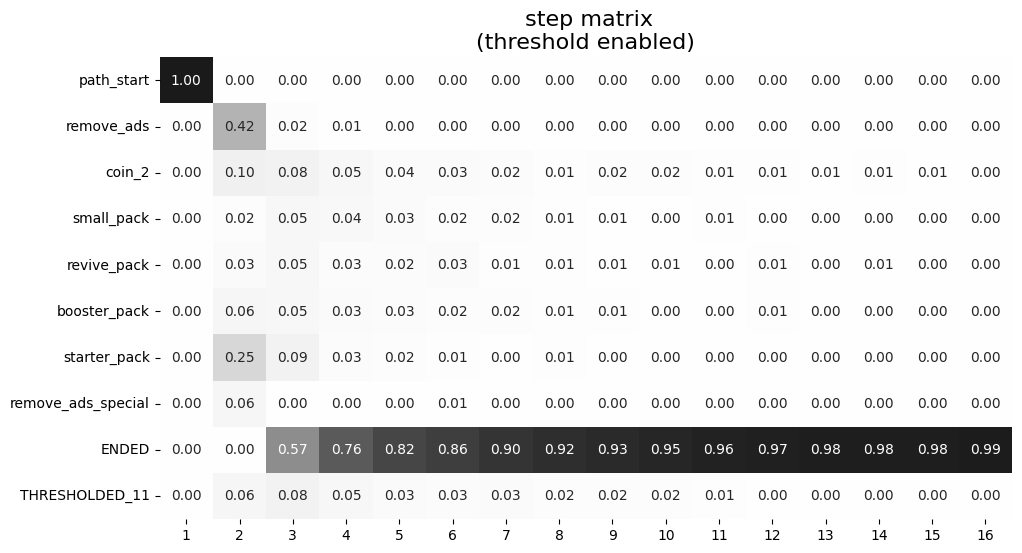

In [ ]:
stream.step_matrix(
    max_steps=16,
    threshold=0.05,
)

In [ ]:
# Group events by user_pseudo_id and aggregate event_names into a sequence
sequence_df = df.groupby('user_pseudo_id').agg(
    sequence=('product_id', lambda x: ' -> '.join(x))
).reset_index()

sequence_df

,user_pseudo_id,sequence
0,01434F9FE5BA4CBDAD08F55B295E2FDD,starter_pack
1,0166A91F60854B6A8D5D15CA572C8620,starter_pack
2,017254d918ff1585bc8988873fb605a6,gold_pass
3,017EF4A439E14351B18DCAB8366D5343,booster_pack -> booster_pack
4,01fe59d3f1e63813bbe19d9d96742458,remove_ads_special
...,...,...
625,fc501b13e44c9c4a6838d456d3306de4,remove_ads_special
626,fdfad11c20cd0fa471ace612894520ee,starter_pack -> small_pack
627,fed9983a6a482bdec6df6abfe794e767,coin_2
628,ff68584c02d11194fb9c756011f9bafd,remove_ads


In [ ]:
# Convert sequences to nodes and links for Sankey diagram
sequences = sequence_df['sequence'].str.split(' -> ')

# Get all unique events
all_events = set()
for seq in sequences:
    all_events.update(seq)

# Create nodes list
nodes = list(all_events)

# Create links dictionary to count transitions
links = {}
for seq in sequences:
    for i in range(len(seq)-1):
        source = seq[i]
        target = seq[i+1]
        key = (source, target)
        links[key] = links.get(key, 0) + 1

# Create source, target and value lists for plotting
source_list = []
target_list = []
value_list = []
for (source, target), value in links.items():
    source_list.append(nodes.index(source))
    target_list.append(nodes.index(target))
    value_list.append(value)

# Create Sankey diagram
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = nodes,
        color = "blue"
    ),
    link = dict(
        source = source_list,
        target = target_list,
        value = value_list
    )
)])

fig.update_layout(title_text="User Flow Sankey Diagram", font_size=10)
fig.show()